In [1]:
import pandas as dp
import numpy as np
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, ConfusionMatrixDisplay

(100, 2)
(100,)


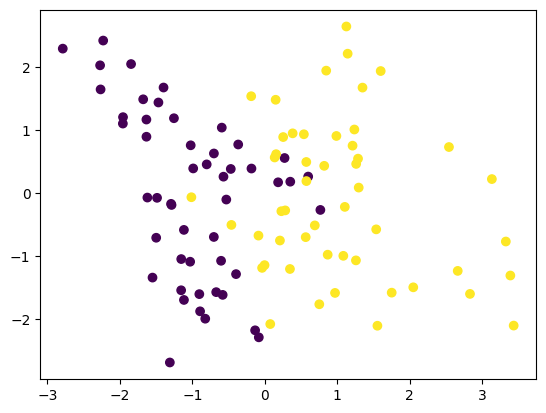

In [44]:
X, y = make_classification(n_samples=100,
                         n_features=2,
                         n_classes=2,
                         n_informative=2,
                         n_redundant=0,
                         n_repeated=0,
                        n_clusters_per_class=2,
                        class_sep=1)
y = np.array(list(map(lambda i: 1 if i == 1 else -1, y)))

print(X.shape)
print(y.shape)

plt.scatter(X[:,0], X[:,1], c=y)

[[-3.1913523 -3.1913523 -3.1913523 ... -3.1913523 -3.1913523 -3.1913523]
 [-3.1913523 -3.1913523 -3.1913523 ... -3.1913523 -3.1913523 -3.1913523]
 [-3.1913523 -3.1913523 -3.1913523 ... -3.1913523 -3.1913523 -3.1913523]
 ...
 [-3.1913523 -3.1913523 -3.1913523 ... -3.1913523 -3.1913523 -3.1913523]
 [-3.1913523 -3.1913523 -3.1913523 ... -3.1913523 -3.1913523 -3.1913523]
 [-3.1913523 -3.1913523 -3.1913523 ... -3.1913523 -3.1913523 -3.1913523]]


C:\Users\Sai\AppData\Local\Temp\ipykernel_21256\550967023.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linistyle'
  plt.contour(x1, x2, z2, color="black", levels=[-1, 0, 1], linistyle=["--", "-", "--"])


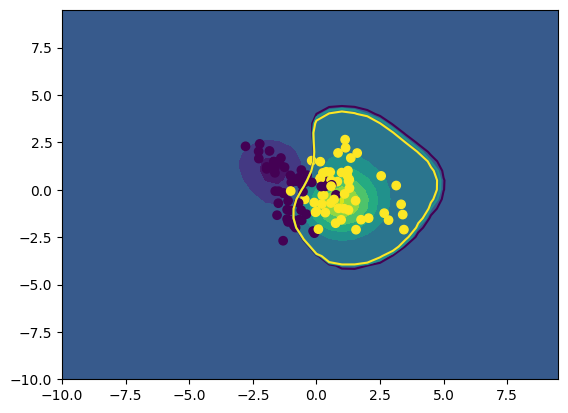

In [62]:
fit_and_plot(epox=10, C=10)

In [17]:
class SMO:
  def __init__(self, X, y, kernel="linear", C=1, n_epox=1):
    self.X = X
    self.y = y
    self.n = X.shape[0]
    self.alpha = np.ones(X.shape[0])
    self.b = 0
    self.C = C
    self.kernel = kernel
    self.n_epox = n_epox

  def select_j(self, i):
    j = i
    while j == i:
        j = np.random.randint(0, self.n)
    return j

  def K(self, x1, x2):
    if self.kernel == "linear":
      return np.dot(x1, x2)
    elif self.kernel == "quadric":
      return np.sum((x1 - x2)**2)
    elif self.kernel == "gauss":
      return np.exp(-0.5*np.sum((x1 - x2)**2))
    else:
      return 0

  def predict(self, new_x):
    u = 0
    for i in range(self.n):
      u += self.y[i]*self.alpha[i]*self.K(self.X[i], new_x)
    return u - self.b
  def predict_on_X(self, X):
    return np.array([self.predict(X[i]) for i in range(X.shape[0])])

  def signum_predict(self, X):
    return np.array([np.sign(self.predict(X[i])) for i in range(X.shape[0])])

  def error(self, i):
    return self.predict(self.X[i]) - self.y[i]

  def ny(self, i, j):
    return self.K(self.X[i], self.X[i]) \
        -2*self.K(self.X[j], self.X[i]) \
          +self.K(self.X[j], self.X[j])

  def fit(self):
    for epox in range(self.n_epox):
      for i in range(self.n):
        # for j in range(i):
          j = self.select_j(i)
          # определяем ограничения для alpha[j]
          if y[i] == y[j]:
            L = max(0, self.alpha[j] + self.alpha[i] + self.C)
            H = max(0, min(self.C, self.alpha[j] + self.alpha[i]))
          else:
            L = max(0, self.alpha[j] - self.alpha[i])
            H = max(0, min(self.C, self.C + self.alpha[j] - self.alpha[i]))

          # оптимизируем alpha[j]
          new_alpha_j = self.alpha[j] + self.y[j] * (self.error(i) - self.error(j)) / self.ny(i, j)

          # подгоняем alpha[j] под ограничения
          if new_alpha_j > H:
            new_alpha_j = H
          elif new_alpha_j < L:
            new_alpha_j = L

          # оптимизируем alpha[i]
          new_alpha_i = self.alpha[i] + y[i]*y[j]*(self.alpha[j] - new_alpha_j)
          new_alpha_i = max(0, new_alpha_i)
          # оптимизируем bias
          b_i = self.error(i)
          b_i += y[i]*(new_alpha_i - self.alpha[i])*self.K(self.X[i], self.X[i])
          b_i += y[j]*(new_alpha_j - self.alpha[j])*self.K(self.X[i], self.X[j])
          b_i += self.b

          b_j = self.error(j)
          b_j += y[i]*(new_alpha_i - self.alpha[i])*self.K(self.X[i], self.X[j])
          b_j += y[j]*(new_alpha_j - self.alpha[j])*self.K(self.X[i], self.X[j])
          b_j += self.b

          # выбор оптимального bias между b_i и b_j
          if (L < new_alpha_i and new_alpha_i < H):
            new_b = b_i
          elif (L < new_alpha_j and new_alpha_j < H):
            new_b = b_j
          else:
            new_b = (b_i + b_j)/2

          if (np.isnan(new_b) or np.isnan(new_alpha_i) or np.isnan(new_alpha_j)):
            continue

          self.b = new_b
          self.alpha[i] = new_alpha_i
          self.alpha[j] = new_alpha_j

model = SMO(X, y, kernel="gauss", C=1)
model.fit()
y_pred = model.signum_predict(X)

[[4.85749696 4.85749696 4.85749696 ... 4.85749696 4.85749696 4.85749696]
 [4.85749696 4.85749696 4.85749696 ... 4.85749696 4.85749696 4.85749696]
 [4.85749696 4.85749696 4.85749696 ... 4.85749696 4.85749696 4.85749696]
 ...
 [4.85749696 4.85749696 4.85749696 ... 4.85749696 4.85749696 4.85749696]
 [4.85749696 4.85749696 4.85749696 ... 4.85749696 4.85749696 4.85749696]
 [4.85749696 4.85749696 4.85749696 ... 4.85749696 4.85749696 4.85749696]]


C:\Users\Sai\AppData\Local\Temp\ipykernel_21256\550967023.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linistyle'
  plt.contour(x1, x2, z2, color="black", levels=[-1, 0, 1], linistyle=["--", "-", "--"])


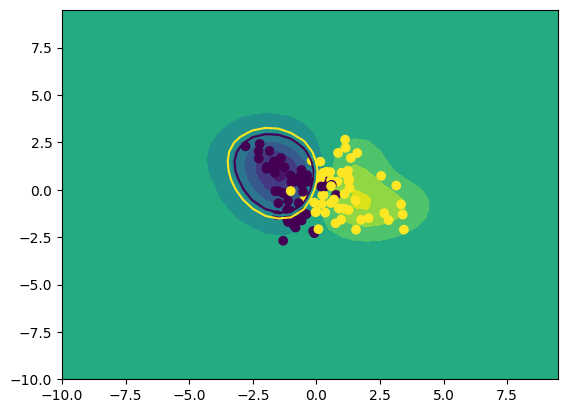

In [52]:
def fit_and_plot(epox=1, C=1):
  model = SMO(X, y, kernel="gauss", C=C, n_epox=epox)
  model.fit()
  y_pred = model.signum_predict(X)

  x1 = np.arange(-10, 10, 0.5)
  x2 = x1
  x1, x2 = np.meshgrid(x1, x2)

  X_ = np.c_[x1.ravel(), x2.ravel()]
  z = model.predict_on_X(X_).reshape(x1.shape)
  print(z)
  z2 = z
  plt.contourf(x1, x2, z2)
  plt.contour(x1, x2, z2, color="black", levels=[-1, 0, 1], linistyle=["--", "-", "--"])
  plt.scatter(X[:,0], X[:,1], c=y)

fit_and_plot()

[-1 -1 -1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1
 -1  1  1  1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1
  1  1 -1  1  1 -1 -1  1 -1  1  1  1  1  1  1  1 -1  1 -1  1 -1 -1 -1  1
 -1  1 -1 -1  1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1 -1  1  1 -1 -1  1 -1  1  1  1 -1  1  1  1 -1  1 -1 -1  1 -1  1  1  1
 -1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1 -1  1 -1 -1 -1 -1 -1 -1  1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1 -1  1 -1  1 -1  1 -1
 -1 -1 -1 -1  1 -1  1  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1
 -1  1 -1 -1 -1  1  1  1]


C:\Users\Sai\AppData\Local\Temp\ipykernel_21256\3241990254.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


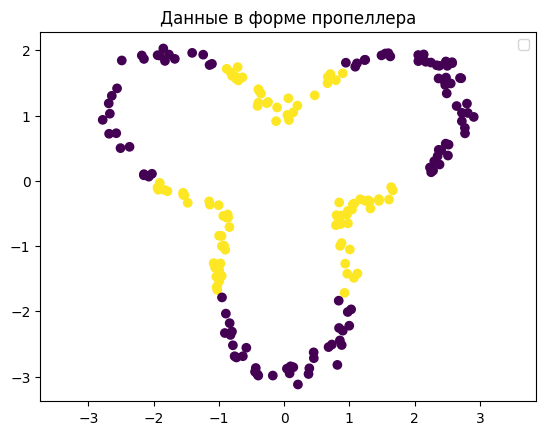

In [37]:
def make_propeller(n_samples=100):
    np.random.seed(42)
    X = []
    y = []
    for i in range(n_samples):
        # Случайная угловая координата
        theta = np.random.uniform(0, 2 * np.pi)
        r = np.sin(3 * theta) + 2 + np.random.normal(scale=0.1)  # Радиус с шумом
        x = r * np.cos(theta)
        y_coord = r * np.sin(theta)
        X.append([x, y_coord])
        # Параметр класса
        if r > 2:
            y.append(-1)
        else:
            y.append(1)
    return np.array(X), np.array(y)

# Генерация и визуализация данных
X, y = make_propeller(n_samples=200)
print(y)
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.title('Данные в форме пропеллера')
plt.legend()
plt.axis('equal')
plt.show()


[[-5.00563317 -5.00563317 -5.00563317 ... -5.00563317 -5.00563317
  -5.00563317]
 [-5.00563317 -5.00563317 -5.00563317 ... -5.00563317 -5.00563317
  -5.00563317]
 [-5.00563317 -5.00563317 -5.00563317 ... -5.00563317 -5.00563317
  -5.00563317]
 ...
 [-5.00563317 -5.00563317 -5.00563317 ... -5.00563317 -5.00563317
  -5.00563317]
 [-5.00563317 -5.00563317 -5.00563317 ... -5.00563317 -5.00563317
  -5.00563317]
 [-5.00563317 -5.00563317 -5.00563317 ... -5.00563317 -5.00563317
  -5.00563317]]


C:\Users\Sai\AppData\Local\Temp\ipykernel_21256\352467050.py:15: UserWarning: The following kwargs were not used by contour: 'color', 'linistyle'
  plt.contour(x1, x2, z2, color="black", levels=[-1, 0, 1], linistyle=["--", "-", "--"])


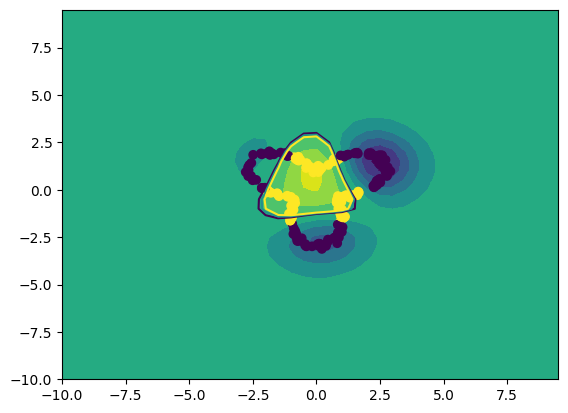

In [41]:
fit_and_plot()